In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
from scipy.stats import skew

# 폰트깨짐 현상 해결
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

In [296]:
df_seoul2_inout = pd.read_csv('preprocessing_final.csv')

In [297]:
df_seoul2_inout.drop(['거주지역_시도','거주지역_시군구'], axis=1, inplace=True)

In [298]:
df_seoul2_inout

,년월,카드이용지역,업종명,연령대,성별,이용금액_원,날짜,외부인의_결제여부
0,201901,강남구,건강보조식품 소매업,60s,F,1181300,2019-01-01,0
1,201901,강남구,건강보조식품 소매업,50s,F,756000,2019-01-01,0
2,201901,강남구,건강보조식품 소매업,50s,F,2480710,2019-01-01,0
3,201901,강남구,건강보조식품 소매업,60s,F,3604450,2019-01-01,0
4,201901,강남구,건강보조식품 소매업,50s,F,1952750,2019-01-01,0
...,...,...,...,...,...,...,...,...
6259497,202003,중랑구,화장품 및 방향제 소매업,40s,F,25800,2020-03-01,0
6259498,202003,중랑구,화장품 및 방향제 소매업,50s,M,231700,2020-03-01,0
6259499,202003,중랑구,화장품 및 방향제 소매업,50s,F,288700,2020-03-01,0
6259500,202003,중랑구,화장품 및 방향제 소매업,60s,M,69600,2020-03-01,0


In [299]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [300]:
# 날짜 처리
df_seoul2_inout['연도'] = df_seoul2_inout['년월'].apply(lambda x: grap_year(x))
df_seoul2_inout['월'] = df_seoul2_inout['년월'].apply(lambda x: grap_month(x))
df_seoul2_inout = df_seoul2_inout.drop(['년월'], axis=1)

In [301]:
df_seoul2_inout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259502 entries, 0 to 6259501
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   카드이용지역     object
 1   업종명        object
 2   연령대        object
 3   성별         object
 4   이용금액_원     int64 
 5   날짜         object
 6   외부인의_결제여부  int64 
 7   연도         int64 
 8   월          int64 
dtypes: int64(4), object(5)
memory usage: 429.8+ MB


In [302]:
# 데이터 정제
columns = ['카드이용지역', '업종명', '외부인의_결제여부', '연령대', '성별', '연도', '월']
columns

['카드이용지역', '업종명', '외부인의_결제여부', '연령대', '성별', '연도', '월']

In [303]:
df_seoul2_inout_ = df_seoul2_inout.groupby(columns).sum().reset_index(drop=False)

In [304]:
df_seoul2_inout_

,카드이용지역,업종명,외부인의_결제여부,연령대,성별,연도,월,이용금액_원
0,강남구,건강보조식품 소매업,0,20s,F,2019,1,2177000
1,강남구,건강보조식품 소매업,0,20s,F,2019,2,281500
2,강남구,건강보조식품 소매업,0,20s,F,2019,3,1133600
3,강남구,건강보조식품 소매업,0,20s,F,2019,4,431000
4,강남구,건강보조식품 소매업,0,20s,F,2019,5,1122300
...,...,...,...,...,...,...,...,...
255336,중랑구,화장품 및 방향제 소매업,1,70s,M,2019,11,2721850
255337,중랑구,화장품 및 방향제 소매업,1,70s,M,2019,12,4149080
255338,중랑구,화장품 및 방향제 소매업,1,70s,M,2020,1,2374100
255339,중랑구,화장품 및 방향제 소매업,1,70s,M,2020,2,2768100


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


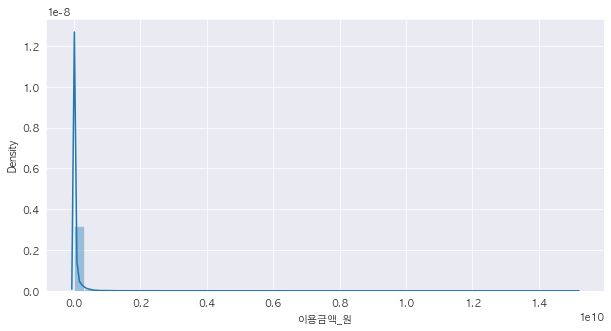

In [305]:
plt.figure(figsize=(10,5))
sns.distplot(df_seoul2_inout_['이용금액_원'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


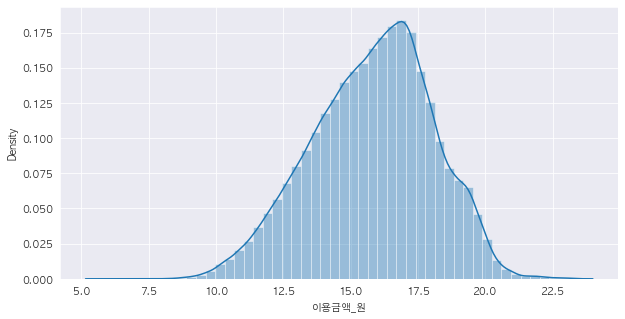

In [306]:
plt.figure(figsize=(10,5))
df_seoul2_inout_['이용금액_원'] = np.log1p(df_seoul2_inout_['이용금액_원'])
sns.distplot(df_seoul2_inout_['이용금액_원'])

In [259]:
df_seoul2_inout_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255341 entries, 0 to 255340
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   카드이용지역     255341 non-null  object 
 1   업종명        255341 non-null  object 
 2   외부인의_결제여부  255341 non-null  int64  
 3   연령대        255341 non-null  object 
 4   성별         255341 non-null  object 
 5   연도         255341 non-null  int64  
 6   월          255341 non-null  int64  
 7   이용금액_원     255341 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 15.6+ MB


In [75]:
# df_seoul2_inout_['연령대'] = df_seoul2_inout_['연령대'].astype('str')

In [260]:
df_seoul2_inout_

,카드이용지역,업종명,외부인의_결제여부,연령대,성별,연도,월,이용금액_원
0,강남구,건강보조식품 소매업,0,20s,F,2019,1,14.593459
1,강남구,건강보조식품 소매업,0,20s,F,2019,2,12.547891
2,강남구,건강보조식품 소매업,0,20s,F,2019,3,13.940910
3,강남구,건강보조식품 소매업,0,20s,F,2019,4,12.973866
4,강남구,건강보조식품 소매업,0,20s,F,2019,5,13.930892
...,...,...,...,...,...,...,...,...
255336,중랑구,화장품 및 방향제 소매업,1,70s,M,2019,11,14.816823
255337,중랑구,화장품 및 방향제 소매업,1,70s,M,2019,12,15.238397
255338,중랑구,화장품 및 방향제 소매업,1,70s,M,2020,1,14.680129
255339,중랑구,화장품 및 방향제 소매업,1,70s,M,2020,2,14.833672


In [261]:
df_onehot = pd.get_dummies(df_seoul2_inout_)

In [262]:
df_onehot.head()

,외부인의_결제여부,연도,월,이용금액_원,카드이용지역_강남구,카드이용지역_강동구,카드이용지역_강북구,카드이용지역_강서구,카드이용지역_관악구,카드이용지역_광진구,...,업종명_화장품 및 방향제 소매업,연령대_10s,연령대_20s,연령대_30s,연령대_40s,연령대_50s,연령대_60s,연령대_70s,성별_F,성별_M
0,0,2019,1,14.593459,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,2019,2,12.547891,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,2019,3,13.940910,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,2019,4,12.973866,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,2019,5,13.930892,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [263]:
print('onehot 전 : ', df_seoul2_inout_.shape)
print('onehot 후 : ', df_onehot.shape)

onehot 전 :  (255341, 8)
onehot 후 :  (255341, 77)


In [264]:
X = df_onehot.drop(['이용금액_원'], axis=1)
y = df_onehot['이용금액_원']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [266]:
# 훈련
model = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [267]:
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rsme = np.sqrt(mse)
r2 = r2_score(y_test, pred)

In [269]:
print('rsme : ', rsme)
print('r2 : ', r2)

rsme :  0.45176375603262475
r2 :  0.9590798667318964


In [270]:
# 예측 템플릿 만들기
card_location = df_seoul2_inout['카드이용지역'].unique()
card_class = df_seoul2_inout['업종명'].unique()
card_inout = df_seoul2_inout['외부인의_결제여부'].unique()
card_age = df_seoul2_inout['연령대'].unique()
card_sex = df_seoul2_inout['성별'].unique()
years = [2021]
months = [8,9,10]

In [273]:
df_seoul2_inout_.drop(['이용금액_원'],axis=1).columns

Index(['카드이용지역', '업종명', '외부인의_결제여부', '연령대', '성별', '연도', '월'], dtype='object')

In [322]:
temp = []
for 카드이용지역 in card_location:
    for 업종명 in card_class:
        for 외부인의_결제여부 in card_inout:
            for 연령대 in card_age:
                for 성별 in card_sex:
                    for 연도 in years:
                        for 월 in months:
                            temp.append([카드이용지역, 업종명, 외부인의_결제여부, 연령대, 성별, 연도, 월])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=df_seoul2_inout_.drop(['이용금액_원'],axis=1).columns)

In [323]:
temp

,카드이용지역,업종명,외부인의_결제여부,연령대,성별,연도,월
0,강남구,건강보조식품 소매업,0,60s,F,2021,8
1,강남구,건강보조식품 소매업,0,60s,F,2021,9
2,강남구,건강보조식품 소매업,0,60s,F,2021,10
3,강남구,건강보조식품 소매업,0,60s,M,2021,8
4,강남구,건강보조식품 소매업,0,60s,M,2021,9
...,...,...,...,...,...,...,...
81895,중랑구,택시 운송업,1,10s,F,2021,9
81896,중랑구,택시 운송업,1,10s,F,2021,10
81897,중랑구,택시 운송업,1,10s,M,2021,8
81898,중랑구,택시 운송업,1,10s,M,2021,9


In [313]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81900 entries, 0 to 81899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   카드이용지역     81900 non-null  object
 1   업종명        81900 non-null  object
 2   외부인의_결제여부  81900 non-null  object
 3   연령대        81900 non-null  object
 4   성별         81900 non-null  object
 5   연도         81900 non-null  object
 6   월          81900 non-null  object
dtypes: object(7)
memory usage: 4.4+ MB


In [324]:
temp['외부인의_결제여부'] = temp['외부인의_결제여부'].map(lambda x : int(x))
temp['연도'] = temp['연도'].map(lambda x : int(x))
temp['월'] = temp['월'].map(lambda x : int(x))

In [325]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81900 entries, 0 to 81899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   카드이용지역     81900 non-null  object
 1   업종명        81900 non-null  object
 2   외부인의_결제여부  81900 non-null  int64 
 3   연령대        81900 non-null  object
 4   성별         81900 non-null  object
 5   연도         81900 non-null  int64 
 6   월          81900 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.4+ MB


In [326]:
temp_onehot = pd.get_dummies(temp)

In [327]:
temp_onehot

,외부인의_결제여부,연도,월,카드이용지역_강남구,카드이용지역_강동구,카드이용지역_강북구,카드이용지역_강서구,카드이용지역_관악구,카드이용지역_광진구,카드이용지역_구로구,...,업종명_화장품 및 방향제 소매업,연령대_10s,연령대_20s,연령대_30s,연령대_40s,연령대_50s,연령대_60s,연령대_70s,성별_F,성별_M
0,0,2021,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,2021,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,2021,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,2021,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,2021,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81895,1,2021,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
81896,1,2021,10,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
81897,1,2021,8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
81898,1,2021,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [328]:
temp

,카드이용지역,업종명,외부인의_결제여부,연령대,성별,연도,월
0,강남구,건강보조식품 소매업,0,60s,F,2021,8
1,강남구,건강보조식품 소매업,0,60s,F,2021,9
2,강남구,건강보조식품 소매업,0,60s,F,2021,10
3,강남구,건강보조식품 소매업,0,60s,M,2021,8
4,강남구,건강보조식품 소매업,0,60s,M,2021,9
...,...,...,...,...,...,...,...
81895,중랑구,택시 운송업,1,10s,F,2021,9
81896,중랑구,택시 운송업,1,10s,F,2021,10
81897,중랑구,택시 운송업,1,10s,M,2021,8
81898,중랑구,택시 운송업,1,10s,M,2021,9


In [329]:
# 예측
pred = model.predict(temp_onehot)
pred = np.expm1(pred)
temp['이용금액_원'] = np.round(pred, 0)
temp['년월'] = temp['연도']*100 + temp['월']
temp = temp[['년월', '카드이용지역', '업종명', '이용금액_원']]
temp = temp.groupby(['년월','카드이용지역', '업종명']).sum().reset_index(drop=False)

In [330]:
temp

,년월,카드이용지역,업종명,이용금액_원
0,202108,강남구,건강보조식품 소매업,7.196388e+07
1,202108,강남구,골프장 운영업,1.998240e+08
2,202108,강남구,과실 및 채소 소매업,2.503044e+08
3,202108,강남구,관광 민예품 및 선물용품 소매업,8.532214e+06
4,202108,강남구,그외 기타 스포츠시설 운영업,5.612627e+07
...,...,...,...,...
2920,202110,중랑구,택시 운송업,4.436380e+08
2921,202110,중랑구,피자 햄버거 샌드위치 및 유사 음식점업,4.422462e+08
2922,202110,중랑구,한식 음식점업,4.538245e+09
2923,202110,중랑구,호텔업,1.342062e+08


In [331]:
y_test.shape

(76603,)

In [332]:
pred.shape

(81900,)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test')]

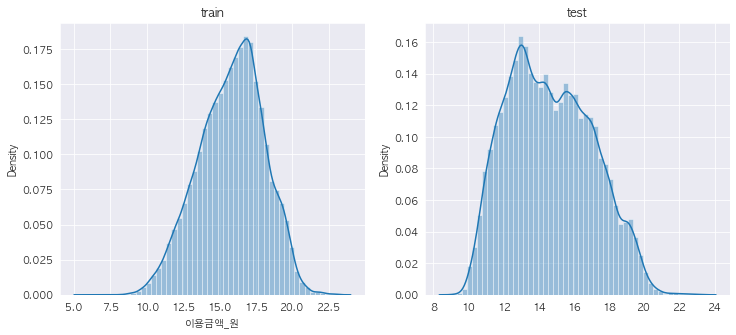

In [334]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_test,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(np.log1p(pred),ax=ax2,bins=50)
ax2.set(title="test")

In [335]:
model.feature_importances_

array([0.04904092, 0.00666345, 0.02176116, 0.01404907, 0.00345983,
       0.00326382, 0.00870339, 0.00403014, 0.00379881, 0.00438713,
       0.00417943, 0.00244698, 0.00687455, 0.00382587, 0.00960207,
       0.00752029, 0.00441801, 0.00971029, 0.0042655 , 0.00325652,
       0.00918571, 0.00526492, 0.00559565, 0.00966038, 0.00255977,
       0.01203496, 0.01417896, 0.00286738, 0.00788016, 0.00107944,
       0.00702337, 0.02434277, 0.00653235, 0.01015847, 0.04424464,
       0.00487127, 0.009565  , 0.00669189, 0.00797085, 0.00394692,
       0.00730323, 0.00219005, 0.00346481, 0.01270832, 0.01237651,
       0.02034223, 0.00721262, 0.0456556 , 0.00999848, 0.0084481 ,
       0.00291085, 0.00603758, 0.01083214, 0.00517664, 0.01125472,
       0.0029326 , 0.02439967, 0.0051821 , 0.01101541, 0.00738553,
       0.01788369, 0.05145603, 0.00843099, 0.01249333, 0.07978788,
       0.00575766, 0.00885251, 0.11761534, 0.02228943, 0.00738691,
       0.00360885, 0.00418645, 0.01343494, 0.03832539, 0.01054

In [341]:
X.columns

Index(['외부인의_결제여부', '연도', '월', '카드이용지역_강남구', '카드이용지역_강동구', '카드이용지역_강북구',
       '카드이용지역_강서구', '카드이용지역_관악구', '카드이용지역_광진구', '카드이용지역_구로구', '카드이용지역_금천구',
       '카드이용지역_노원구', '카드이용지역_도봉구', '카드이용지역_동대문구', '카드이용지역_동작구', '카드이용지역_마포구',
       '카드이용지역_서대문구', '카드이용지역_서초구', '카드이용지역_성동구', '카드이용지역_성북구', '카드이용지역_송파구',
       '카드이용지역_양천구', '카드이용지역_영등포구', '카드이용지역_용산구', '카드이용지역_은평구', '카드이용지역_종로구',
       '카드이용지역_중구', '카드이용지역_중랑구', '업종명_건강보조식품 소매업', '업종명_골프장 운영업',
       '업종명_과실 및 채소 소매업', '업종명_관광 민예품 및 선물용품 소매업', '업종명_그외 기타 스포츠시설 운영업',
       '업종명_그외 기타 종합 소매업', '업종명_기타 대형 종합 소매업', '업종명_기타 수상오락 서비스업',
       '업종명_기타 외국식 음식점업', '업종명_기타 주점업', '업종명_기타음식료품위주종합소매업', '업종명_내항 여객 운송업',
       '업종명_마사지업', '업종명_면세점', '업종명_버스 운송업', '업종명_비알콜 음료점업', '업종명_빵 및 과자류 소매업',
       '업종명_서양식 음식점업', '업종명_수산물 소매업', '업종명_슈퍼마켓', '업종명_스포츠 및 레크레이션 용품 임대업',
       '업종명_여관업', '업종명_여행사업', '업종명_욕탕업', '업종명_육류 소매업', '업종명_일반유흥 주점업',
       '업종명_일식 음식점업', '업종명_자동차 임대업', '업종명_전시 및 행사 대행업', '업종명_정기 항공 운송업',
       '업종명_중식 음식점업', '업종명_차량용 

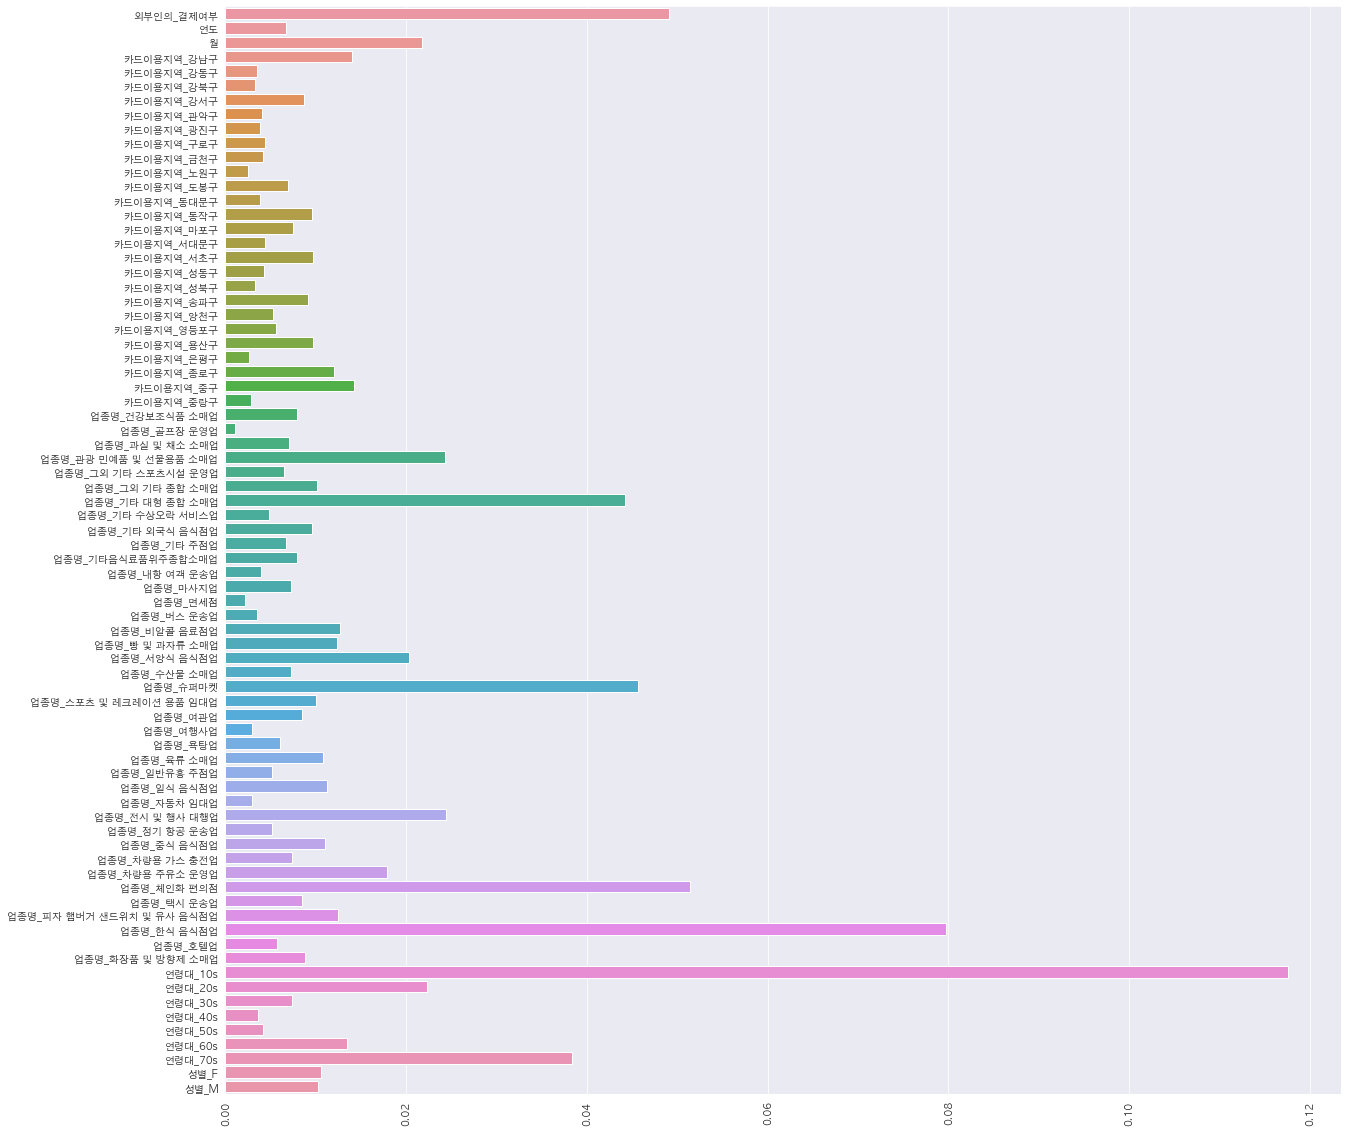

In [343]:
plt.figure(figsize=(20, 20))
plt.xticks(rotation=90)
sns.barplot(x = model.feature_importances_, y = X.columns)

In [346]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor

In [347]:
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth = 10)
gb_reg = GradientBoostingRegressor(n_estimators = 100, max_depth = 10)
ada_reg = AdaBoostRegressor(n_estimators = 100)
#lgbm_reg = LGBMRegressor(n_estimators = 100, max_depth = 10)
estimators = [('random forest', rf_reg),('gradient boosting', gb_reg),('ada boosting', ada_reg)]

In [348]:
def print_metrics(y_test, pred, title):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    print(f'{title} - RMSE : {np.round(rmse, 3)}, R square : {np.round(r2, 3)}')

In [349]:
for title, model in estimators:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print_metrics(y_test, pred, title)

random forest - RMSE : 1.565, R square : 0.509
gradient boosting - RMSE : 0.755, R square : 0.886
ada boosting - RMSE : 2.083, R square : 0.13
